# 제 3차 조별 데이터 분석 실습

* Mission
    * 지금까지 배운 기술을 활용하여 데이터 분석을 해본다.
    * 데이터 원본 분석을 한다.
    * 결측치, 이상치를 점검해 본다.
    * 전처리
    * 탐색적 연구 (Step1, Step2를 반복하여 데이터 분석의 깊이를 더한다.)
         * Step1] 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다. 
         * Step2] 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.
    * 최종 결론을 내린다.

## 아래에 데이터를 import 하세요.

In [3]:
# 데이터 import 코드 구현
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

## 데이터 원본 분석

### 아래 내용을 확인하세요
* 데이터 사이즈
* 데이터 타입
* 각 열의 의미 (열의 이름 및 데이터를 보고 팀원과 상의하여 분석)
* 기타 확인하고 싶은 사항

In [4]:
# 코드 구현
chipo.size, chipo.dtypes

(23110,
 order_id               int64
 quantity               int64
 item_name             object
 choice_description    object
 item_price            object
 dtype: object)

**각 열의 의미**
* order_id : 주문자
* quantity : 갯수
* item_name  : 메뉴
* choice_description : 주문사항
* item_price : 가격

### 원본 데이터 분석 후 학습한 사항

* 가격이 문자형 데이터이므로 전처리 필요

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

In [5]:
# 코드 구현
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

## 결측치, 이상치 처리 방안 결정
 * 처리방안
 * 처리방안 이유

## 전처리 작업

In [6]:
chipo['item_name']= chipo['item_name'].replace('-',' ')
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [7]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo['item_price'] = chipo['item_price'].str.strip('$').astype(float)

In [8]:
chipo.sort_values('item_price')

,order_id,quantity,item_name,choice_description,item_price
1140,471,1,Bottled Water,NaN,1.09
821,338,1,Canned Soda,[Coca Cola],1.09
3926,1575,1,Canned Soda,[Dr. Pepper],1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09
...,...,...,...,...,...
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25


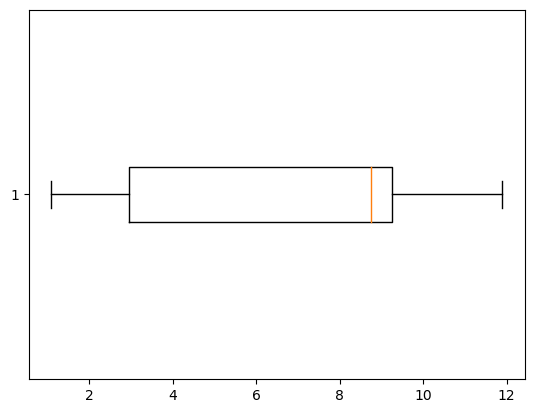

In [9]:
# 가격에 대한 이상치 확인
plt.boxplot(chipo['item_price']/chipo['quantity'], vert = False)
plt.show()
# 이상치 존재하지 않음

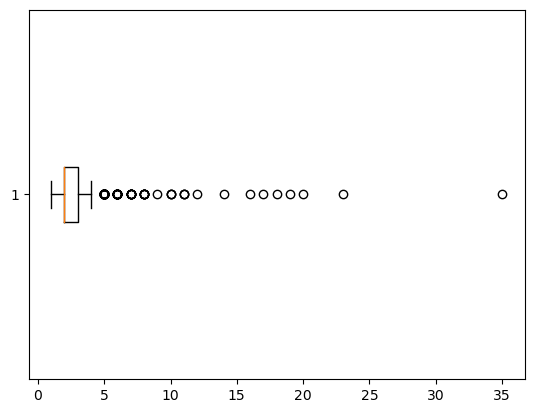

In [10]:
# 갯수에 대한 이상치 확인
plt.boxplot(x=(chipo.groupby('order_id').sum())['quantity'], vert = False)
plt.show()
# 주문량 35로 많이 관측되었을 뿐 이상치로 처리하기 어려움

In [11]:
# choice_description 결측치 전처리 코드
chipo['choice_description'].fillna("[None]",inplace=True)

In [12]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,[None],2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,[None],2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [13]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

## 탐색적 데이터 분석

## 1차 탐색적 분석

### Step1
데이터 분석의 목적, 대상 또는 가설을 세운다.
* 판매량을 시각화하여 아이템 별 매출 순위를 얻는다.
메뉴별 매출현황 분석 목적으로 메뉴,가격,갯수 열을 대상으로 함

In [14]:
chipo_item = chipo['item_name'].value_counts()[:10]
chipo_item

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [15]:
chipo_item_index = chipo_item.index

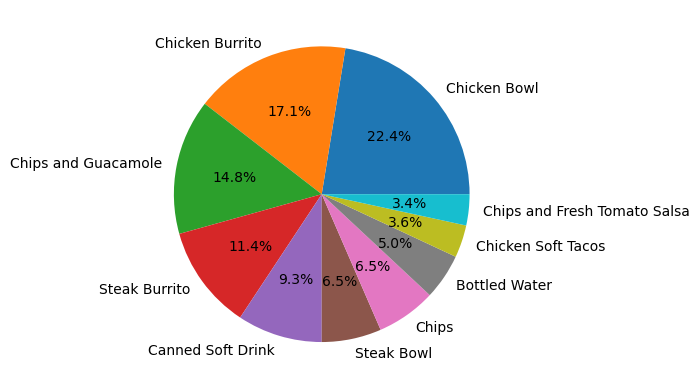

In [16]:
# 메뉴 판매 비율 시각화
plt.pie(chipo['item_name'].value_counts()[:10],labels=chipo_item_index, autopct='%.1f%%')
plt.show()

In [17]:
#메뉴별 매출액 높은순위 10
chipo_item_sales = chipo.groupby(chipo['item_name'])['item_price'].sum().to_frame()
top = chipo_item_sales.sort_values('item_price', ascending=False)[:10]
top

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04
Chicken Salad Bowl,1228.75
Chicken Soft Tacos,1108.09
Veggie Burrito,934.77
Barbacoa Burrito,894.75


In [18]:
# 메뉴별 매출액 낮은순위 10
worst = chipo_item_sales.sort_values('item_price')[:10]
worst

,item_price
item_name,
Chips and Mild Fresh Tomato Salsa,3.00
Veggie Crispy Tacos,8.49
Carnitas Salad,8.99
Crispy Tacos,14.80
Salad,14.80
Bowl,29.60
Steak Salad,35.66
Chips and Roasted Chili-Corn Salsa,43.02
Burrito,44.40


<AxesSubplot:xlabel='item_name'>

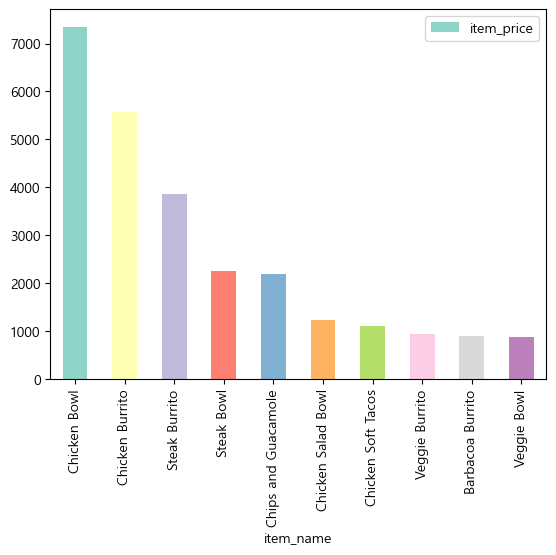

In [28]:
# 메뉴별 매출액 시각화
import seaborn as sns
idx = top.index
colors = sns.color_palette('Set3',len(idx))
top.plot.bar(y='item_price', color=colors)

### Step2
데이터 재구조화
매출이 낮은 메뉴를 제공하는 메뉴에서 제외한다.

In [20]:
# 메뉴별 매출액 낮은순위 10
worst = chipo_item_sales.sort_values('item_price')[:10]
worst

,item_price
item_name,
Chips and Mild Fresh Tomato Salsa,3.00
Veggie Crispy Tacos,8.49
Carnitas Salad,8.99
Crispy Tacos,14.80
Salad,14.80
Bowl,29.60
Steak Salad,35.66
Chips and Roasted Chili-Corn Salsa,43.02
Burrito,44.40


In [21]:
# 메뉴에서 하위매출 아이템을 제외하는 목적의 가상 코드
chipo_drop = chipo.copy()

In [22]:
chipo_drop = chipo.copy()
chipo_drop = chipo_drop.groupby('item_name')['item_price'].sum()
chipo_drop

item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Chicken Crispy Tacos                      472.13
Chicken Sa

In [23]:
chipo_drop.drop(worst.index, axis=0)

item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Chicken Crispy Tacos                      472.13
Chicken Salad                              81.09
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Chips     

In [30]:
# 가상그래프
from matplotlib import font_manager,rc
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

x = np.arange(start=0, stop=31, step=1)
#y_linear = x 
y = -x**2 + 30*x

#fn_linear = np.poly1d(np.polyfit(x, y_linear, deg=1))
fn_quadratic = np.poly1d(np.polyfit(x, y_quadratic, deg=2))

plt.plot(x,y, 'maroon', linewidth=3.)

plt.xlabel('메뉴개수감소량')
plt.ylabel('매출(%)')

# x축, y축 표시 영역 범위 설정
#plt.xlim((min(x)-1, max(x)+1))
plt.xlim([0, 30])
plt.ylim([0, 300])
#plt.ylim((min(y_quadratic)-10, max(y_quadratic)+10))

plt.show()

NameError: name 'y_quadratic' is not defined

---

### Step1과 Step2를 반복하며 내용을 정리하세요.

## 2차 탐색적 데이터 분석

## 3차 탐색적 데이터 분석

## 최종결론
지금까지 학습한 정보를 토대로 최종 결론을 내려보세요.